In [2]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define a transform to normalize the data
transform = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# Load your own dataset
dataset = datasets.ImageFolder(root="dataaa/dataset", transform=transform)  # replace with your dataset path
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Load the pre-trained AlexNet model
alexnet = models.alexnet(pretrained=True)

# Modify the last layer to match the number of classes in your dataset
num_classes = 2
alexnet.classifier[6] = nn.Linear(4096, num_classes)

# If GPU is available, move the model to GPU memory
if torch.cuda.is_available():
    alexnet = alexnet.cuda()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(alexnet.parameters(), lr=0.001)

# Training loop
for epoch in range(10):  # loop over the dataset multiple times
    for inputs, labels in dataloader:
        # if GPU is available, move the data to GPU memory
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()

        # forward pass
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)

        # backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1} completed. Loss: {loss.item()}")

print("Training completed.")


Epoch 1 completed. Loss: 0.0
Epoch 2 completed. Loss: 0.0
Epoch 3 completed. Loss: 0.0
Epoch 4 completed. Loss: 0.0
Epoch 5 completed. Loss: 0.0
Epoch 6 completed. Loss: 0.0
Epoch 7 completed. Loss: 0.0
Epoch 8 completed. Loss: 0.0
Epoch 9 completed. Loss: 0.0
Epoch 10 completed. Loss: 0.0
Training completed.


In [5]:
# Load your validation dataset
val_dataset = datasets.ImageFolder(root="dataaa/dataset", transform=transform)  # replace with your validation dataset path
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

# Evaluation on validation set
alexnet.eval()  # set model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # temporarily set all requires_grad flags to false
    for inputs, labels in val_dataloader:
        # if GPU is available, move the data to GPU memory
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()

        # forward pass and calculate accuracy
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on validation set: {100 * correct / total}%")

# Save the trained model
torch.save(alexnet.state_dict(), "alexnet_model.pth")  # replace with your path to save the model


Accuracy on validation set: 100.0%


In [8]:
from PIL import Image
import torchvision.transforms as transforms

# Load an image
img = Image.open("5.jpg") 

# Preprocess the image
transform = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
img_t = transform(img)

# Create a mini-batch as expected by the model
img_t = img_t.unsqueeze(0)  # since we have only one image

# If GPU is available, move the input tensor to GPU memory
if torch.cuda.is_available():
    img_t = img_t.cuda()

# Use the model for prediction
model.eval()
with torch.no_grad():
    output = model(img_t)

# Print the predicted class
_, predicted = torch.max(output, 1)
class_names = ['fraction', 'non-fraction'] 
print('Predicted class:', class_names[predicted.item()])



Predicted class: fraction


Predicted class: fraction


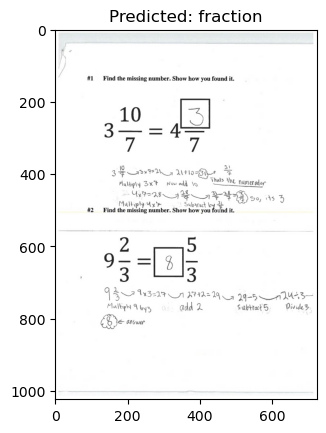

In [17]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Load an image
img_path = "7.jpg"  # replace with the path to your image
img = Image.open(img_path)

# Preprocess the image
transform = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
img_t = transform(img)

# Create a mini-batch as expected by the model
img_t = img_t.unsqueeze(0)  # since we have only one image

# If GPU is available, move the input tensor to GPU memory
if torch.cuda.is_available():
    img_t = img_t.cuda()

# Use the model for prediction
model.eval()
with torch.no_grad():
    output = model(img_t)

# Print the predicted class
_, predicted = torch.max(output, 1)
class_names = ['fraction', 'non-fraction'] 
print('Predicted class:', class_names[predicted.item()])

# Display the image and its predicted class
img = Image.open(img_path)  # load the original image (without transforms) for display
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted.item()]}")
plt.show()
